In [196]:
import pandas as pd
import numpy as np

# 데이터 로드

In [197]:
airport = pd.read_csv('./Airport Codes Dataset.csv')
flight = pd.read_csv('./Flight on-time performance.csv')

In [198]:
airport.columns

Index(['airport_id', 'city', 'state', 'name'], dtype='object')

# 데이터 병합

In [199]:
airport_ori = airport.rename(columns = {'city': 'Ori-city', 'state':'Ori-state', 'name':'Ori-airport'})

In [200]:
flight.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'DestAirportID', 'CRSDepTime', 'DepTimeBlk',
       'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrTimeBlk', 'ArrDelay',
       'ArrDel15', 'Cancelled', 'Diverted'],
      dtype='object')

In [201]:
merge_1 = pd.merge(airport_ori,flight, left_on='airport_id', right_on='OriginAirportID', how='right')
merge_1 = merge_1.drop('airport_id', axis=1)
len(merge_1.columns)

21

In [202]:
merge_1.shape

(504397, 21)

In [203]:
airport_dest = airport.rename(columns = {'city': 'Dest-city', 'state':'Dest-state', 'name':'Dest-airport'})

In [204]:
merge_2 = pd.merge(airport_dest, merge_1, left_on='airport_id', right_on='DestAirportID',how='right')
merge_2 = merge_2.drop('airport_id', axis=1)
len(merge_2.columns)

24

In [205]:
merge_2.columns

Index(['Dest-city', 'Dest-state', 'Dest-airport', 'Ori-city', 'Ori-state',
       'Ori-airport', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Carrier', 'OriginAirportID', 'DestAirportID', 'CRSDepTime',
       'DepTimeBlk', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrTimeBlk',
       'ArrDelay', 'ArrDel15', 'Cancelled', 'Diverted'],
      dtype='object')

In [206]:
data = merge_2[['DayOfWeek', 'Carrier', 'DepTimeBlk', 'DepDelay', 'DepDel15', 'ArrTimeBlk', 'ArrDel15','Ori-city', 'Ori-state', 'Ori-airport', 'Dest-city', 'Dest-state', 'Dest-airport', 'ArrDelay']]

# 결측치 확인 및 삭제

In [207]:
np.sum(data.isna())

DayOfWeek          0
Carrier            0
DepTimeBlk         0
DepDelay        3697
DepDel15        3697
ArrTimeBlk         0
ArrDel15        4717
Ori-city           0
Ori-state          0
Ori-airport        0
Dest-city          0
Dest-state         0
Dest-airport       0
ArrDelay        4717
dtype: int64

In [208]:
data = data.dropna()

In [209]:
np.sum(data.isna())

DayOfWeek       0
Carrier         0
DepTimeBlk      0
DepDelay        0
DepDel15        0
ArrTimeBlk      0
ArrDel15        0
Ori-city        0
Ori-state       0
Ori-airport     0
Dest-city       0
Dest-state      0
Dest-airport    0
ArrDelay        0
dtype: int64

# 데이터 타입 변경

In [210]:
data['ArrDel15'].astype('category')

C:\Users\user\anaconda3\lib\site-packages\IPython\lib\pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
504392    0.0
504393    0.0
504394    0.0
504395    0.0
504396    0.0
Name: ArrDel15, Length: 499680, dtype: category
Categories (2, float64): [0.0, 1.0]

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499680 entries, 0 to 504396
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DayOfWeek     499680 non-null  int64  
 1   Carrier       499680 non-null  object 
 2   DepTimeBlk    499680 non-null  object 
 3   DepDelay      499680 non-null  float64
 4   DepDel15      499680 non-null  float64
 5   ArrTimeBlk    499680 non-null  object 
 6   ArrDel15      499680 non-null  float64
 7   Ori-city      499680 non-null  object 
 8   Ori-state     499680 non-null  object 
 9   Ori-airport   499680 non-null  object 
 10  Dest-city     499680 non-null  object 
 11  Dest-state    499680 non-null  object 
 12  Dest-airport  499680 non-null  object 
 13  ArrDelay      499680 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 57.2+ MB


# 인코딩

In [221]:
from sklearn.preprocessing import LabelEncoder

In [213]:
for col in [col for col in data.columns if data[col].dtype =='object']:
    print(f'컬렴명: {col:14s}, 유니크값:{len(data[col].unique() )}')

컬렴명: Carrier       , 유니크값:16
컬렴명: DepTimeBlk    , 유니크값:19
컬렴명: ArrTimeBlk    , 유니크값:19
컬렴명: Ori-city      , 유니크값:268
컬렴명: Ori-state     , 유니크값:53
컬렴명: Ori-airport   , 유니크값:279
컬렴명: Dest-city     , 유니크값:268
컬렴명: Dest-state    , 유니크값:53
컬렴명: Dest-airport  , 유니크값:279


In [222]:
for i in ['Carrier','DepTimeBlk','ArrTimeBlk', 'Ori-city','Ori-state','Ori-airport', 'Dest-city','Dest-state','Dest-airport']:
    data[i]= LabelEncoder().fit_transform(data[i])

# x변수 y 변수 나누기

In [223]:
y = data['ArrDel15']
x = data.drop('ArrDel15', axis=1)

# 자료분할

In [216]:
from sklearn.model_selection import train_test_split

In [224]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.3, stratify= y, random_state=0)

# 모델 생성

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [225]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

# 모델 예측

In [226]:
y_hat = model.predict(x_test)

# 모델 평가

In [227]:
from sklearn.metrics import precision_score, roc_auc_score, recall_score, f1_score, accuracy_score
print(f'정확도 : {accuracy_score(y_test, y_hat):.3f}')
print(f'재현율 : {recall_score(y_test, y_hat):.3f}')
print(f'precision : {precision_score(y_test, y_hat):.3f}')
print(f'F1 : {f1_score(y_test, y_hat):.3f}')
print(f'roc_auc : {roc_auc_score(y_test, model.predict_proba(x_test)[:,1]):.3f}')

정확도 : 1.000
재현율 : 1.000
precision : 1.000
F1 : 1.000
roc_auc : 1.000


In [238]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_hat)
cm

array([[129438,      0],
       [     0,  20466]], dtype=int64)

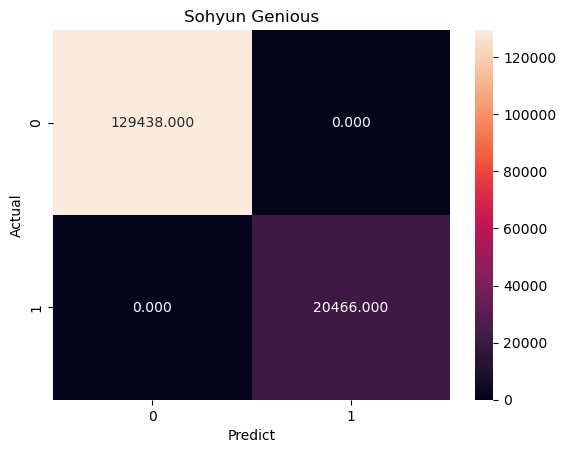

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm,annot=True,fmt='.3f')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title ('Sohyun Genious')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


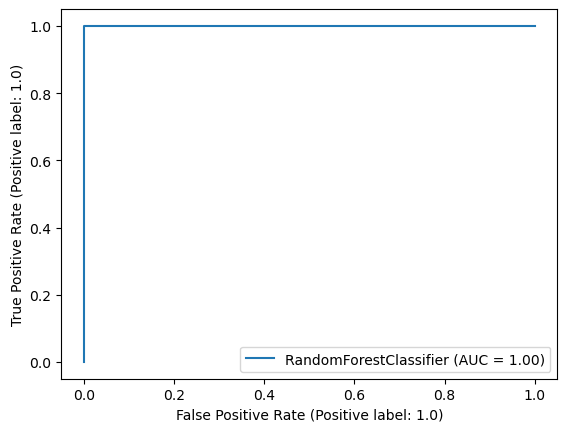

In [240]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,x_test, y_test)
plt.show()

# feature importance

In [243]:
importnace = {k:v for k,v in zip (x.columns, model.feature_importances_)}
df_importance = pd.DataFrame(pd.Series(importnace), columns = ['importance']).sort_values('importance',ascending=False)
df_importance

,importance
ArrDelay,0.679264
DepDelay,0.189148
DepDel15,0.120411
DepTimeBlk,0.002101
Carrier,0.001941
ArrTimeBlk,0.001891
DayOfWeek,0.000896
Dest-city,0.000805
Dest-state,0.000736
Ori-airport,0.000729


# 하이퍼 파라메터 및 교차검증

In [231]:
from sklearn.model_selection import GridSearchCV

In [232]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [235]:
parameter = { 'criterion':['gini','entropy'],
             'bootstrap':[True, False],
             'min_samples_split':[1,2]}
gs = GridSearchCV(model, parameter, cv=5, scoring='accuracy',n_jobs=-1)

In [236]:
gs.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'min_samples_split': [1, 2]},
             scoring='accuracy')

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

In [ ]:
y_hat = gs.best_estimator_.predict(x_test)

In [ ]:
print(f'정확도 : {accuracy_score(y_test, y_hat):.3f}')
print(f'재현율 : {recall_score(y_test, y_hat):.3f}')
print(f'precision : {precision_score(y_test, y_hat):.3f}')
print(f'F1 : {f1_score(y_test, y_hat):.3f}')
print(f'roc_auc : {roc_auc_score(y_test, model.predict_proba(x_test)[:,1]):.3f}')